# About Task
We are asked to make a customer clustering at an e-commerce to cluster the customers

<h1> Why This is important?</h>
<p>
In today’s fast-paced e-commerce landscape, understanding customers isn’t just a strategy—it’s a necessity. Our task is to design a customer clustering framework to unlock valuable insights into customer behavior. This approach will allow us to segment customers based on their purchasing patterns, preferences, and demographics.

Why does this matter? Because not all customers are the same. A one-size-fits-all promotion strategy no longer works in a market flooded with choices. By clustering customers into meaningful groups, we can pinpoint what types of product promotions resonate most with each segment.

This isn’t just about boosting sales—it’s about creating personalized experiences that make customers feel understood and valued. It’s about fostering loyalty in an environment where customer retention is more critical than ever.

By leveraging clustering, we’re not just analyzing data; we’re shaping strategies that align with customer needs, driving business growth and long-term success.</P>

<br><br><br>
<p> and of course.... LEADS HEHEHEHEHEH.... money money money</P>

# Library and Styling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.stats import chi2_contingency

In [2]:
def set_global_styles():
    sns.set_style({"axes.facecolor": "lightyellow",
                   "figure.facecolor": "lightyellow"})

    # this one is for matplotlib
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['axes.facecolor'] = 'lightyellow'
    plt.rcParams['figure.facecolor'] = 'lightyellow'

    # Set grid color to bone white
    plt.rcParams['grid.color'] = '#EAE3D9'  # Bone white color


set_global_styles()
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])


# About the data

We have data about our customer that have bought some of our products that we can use to understand our customer more <br>

- Customer’s ID: the customer’s ID
- Birth Date: the birth date of the customer
- Gender: the gender of the customer  
- Item Purchased: the type of item purchased by the customer  
- Category: the purchased item’s category  
- Purchase Amount (USD): amount spent by the customer for the item (USD)  
- Location: the customer’s location  
- Size: the size of the item  
- Color: the color of the item  
- Season: the season when the purchase occurred  
- Review Rating: the rating left by the customer  
- Subscription Status: the customer’s subscription status  
- Payment Method: the payment method used by the customer  
- Shipping Type: the shipment type of the purchase  
- Discount Applied: whether discounts were applied to the purchase (yes/no)  
- Promo Code Used: whether promo codes were used for the purchase (yes/no)  
- Previous Purchases: the last purchase made by the customer (month)  
- Preferred Payment Method: the preferred payment method of the customer  
- Frequency of Purchases: the average frequency of the customer’s purchases last year  


# Structure Exploratory Data Analysis + Data Preprocessing for Analytical EDA


In [3]:
data = pd.read_csv("2A.tsv", delimiter = "\t", index_col = 'Customer ID')
data.head()

,Birth Date,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,,
1,1969/03/05,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
2,2005/07/01,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
3,1974/12/01,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,2003/11/21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,1979/09/13,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## Checking structure, missing values, and duplicates

In [4]:
data.isna().sum()

,0
Birth Date,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0
Review Rating,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 1 to 3900
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Birth Date                3900 non-null   object 
 1   Gender                    3900 non-null   object 
 2   Item Purchased            3900 non-null   object 
 3   Category                  3900 non-null   object 
 4   Purchase Amount (USD)     3900 non-null   int64  
 5   Location                  3900 non-null   object 
 6   Size                      3900 non-null   object 
 7   Color                     3900 non-null   object 
 8   Season                    3900 non-null   object 
 9   Review Rating             3900 non-null   float64
 10  Subscription Status       3900 non-null   object 
 11  Payment Method            3900 non-null   object 
 12  Shipping Type             3900 non-null   object 
 13  Discount Applied          3900 non-null   object 
 14  Promo Code Us

In [ ]:
data.duplicated().sum()

0

There is no single missing values in our data, which is relieving and very good. Also there is no single row that need to be dropped because duplicated

## Categorical data unique values

I always love to split my data to categorical and numerical too, too see the structure of the data even deeper and you know to find some anomaly and make a better visualization for the Exploratory data Analysis later

In [5]:
categorical_data = data.select_dtypes(include=['object'])
numerical_data = data.select_dtypes(exclude=['object'])

In [ ]:
for col in categorical_data.columns:
    print(f"Unique values in column '{col}':")
    print(data[col].value_counts())
    print()

Unique values in column 'Birth Date':
Birth Date
1970/12/28    3
1965/08/28    3
1966/12/27    3
1970/08/27    3
1969/05/14    3
             ..
1985/06/23    1
1996/09/02    1
1984/01/21    1
1972/03/05    1
1980/03/30    1
Name: count, Length: 3534, dtype: int64

Unique values in column 'Gender':
Gender
Male      2642
Female    1231
f           17
M           10
Name: count, dtype: int64

Unique values in column 'Item Purchased':
Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

Unique values in column 'Category':
Category
Clothing       1737
Accesso

in this data we got some findings which we can do to improve our data:
- Birthdate = We can use the birthdate to know the age demographic of our Customers
- The Gender is represented in Male, Female, m, and f, which can we change them into just f/m or femalem/male
- Items purchased is redundant with Category of the items. But I will try to keep it to make data richer.
- Location in the data are the state of US, I will just make it into region of USA based on what I can find in google
- I will also make the color into shade of color, warm, cool, etc
- Discount Applied and Promo Code Used are the same, so I will drop one of these
- Frequency of Purchases have some same values with different name. Every 3 months and Quarterly are the same, Bi-Weekly and Fortnightly are the same.
- Preffered payment method and payment method could be redundant because they dont always pas with their preference tho, we gonna use the data only with what they actually use, so I will drop the preferred
- I also dont think that size is matter in Customer Segmentation especially in clothing, which we usually dont mind about this

### Change the birthdate to age

In [6]:
def calculate_age(birthdate_str):
    birthdate = datetime.strptime(birthdate_str, '%Y/%m/%d')
    today = datetime.now()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))

    return age

data['Age'] = data['Birth Date'].apply(calculate_age)

### Group the features that have high cardinality

In [7]:
# Make the group of each values in these features, to reduce cardinality
color_groups = {
    'Neutral': ['Black', 'Gray', 'White', 'Beige', 'Brown'],
    'Warm': ['Red', 'Orange', 'Yellow', 'Gold', 'Pink', 'Maroon'],
    'Cool': ['Blue', 'Green', 'Teal', 'Cyan', 'Violet', 'Indigo', 'Purple'],
    'Pastel': ['Lavender', 'Turquoise', 'Peach', 'Olive', 'Magenta'],
    'Other': ['Silver', 'Charcoal']
}

region_groups = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'],
    'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'South': ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia'],
    'West': ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming'],
}

# Map the grouped values
data['Color Group'] = data['Color'].map(lambda x: next((group for group, colors in color_groups.items() if x in colors), 'Error Placeholder'))
data['Region'] = data['Location'].map(lambda x: next((region for region, states in region_groups.items() if x in states), 'Error Placeholder'))

### Fix some anomalies in the data

In [8]:
# Changing the anomlaies in the data
data['Gender'] = data['Gender'].replace({'M': 'Male', 'f': 'Female'})
data['Frequency of Purchases'] = data['Frequency of Purchases'].replace({'Every 3 Months': 'Quarterly', 'Fortnightly': 'Bi-Weekly'})

### Drop some features that no longer needed

In [9]:
categorical_data = data.select_dtypes(include=['object'])
numerical_data = data.select_dtypes(include=['int64', 'float64'])
data_to_drop = ['Discount Applied', 'Preferred Payment Method', 'Color', 'Birth Date', 'Location']
data.drop(data_to_drop, axis=1, inplace=True)
data.head()

,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Promo Code Used,Previous Purchases,Frequency of Purchases,Age,Color Group,Region
Customer ID,,,,,,,,,,,,,,,,
1,Male,Blouse,Clothing,53,L,Winter,3.1,Yes,Credit Card,Express,Yes,14,Bi-Weekly,56,Neutral,South
2,Male,Sweater,Clothing,64,L,Winter,3.1,Yes,Bank Transfer,Express,Yes,2,Bi-Weekly,20,Warm,Northeast
3,Male,Jeans,Clothing,73,S,Spring,3.1,Yes,Cash,Free Shipping,Yes,23,Weekly,50,Warm,Northeast
4,Male,Sandals,Footwear,90,M,Spring,3.5,Yes,PayPal,Next Day Air,Yes,49,Weekly,21,Warm,Northeast
5,Male,Blouse,Clothing,49,M,Spring,2.7,Yes,Cash,Free Shipping,Yes,31,Annually,46,Pastel,West


In [10]:
categorical_data = data.select_dtypes(include=['object'])
numerical_data = data.select_dtypes(exclude=['object'])
for col in categorical_data.columns:
    print(f"Unique values in column '{col}':")
    print(data[col].value_counts())
    print()

Unique values in column 'Gender':
Gender
Male      2652
Female    1248
Name: count, dtype: int64

Unique values in column 'Item Purchased':
Item Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Sandals       160
Socks         159
Skirt         158
Scarf         157
Shorts        157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

Unique values in column 'Category':
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Unique values in column 'Size':
Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

Unique values in column 'Season':
Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 1 to 3900
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  3900 non-null   object 
 1   Item Purchased          3900 non-null   object 
 2   Category                3900 non-null   object 
 3   Purchase Amount (USD)   3900 non-null   int64  
 4   Size                    3900 non-null   object 
 5   Season                  3900 non-null   object 
 6   Review Rating           3900 non-null   float64
 7   Subscription Status     3900 non-null   object 
 8   Payment Method          3900 non-null   object 
 9   Shipping Type           3900 non-null   object 
 10  Promo Code Used         3900 non-null   object 
 11  Previous Purchases      3900 non-null   int64  
 12  Frequency of Purchases  3900 non-null   object 
 13  Age                     3900 non-null   int64  
 14  Color Group             3900 non-null   objec

# EDA Analytics

Because K-Means is sensitive to Outliers because its distance based algorithm, we are checking about the outliers first using scatter plot, and hue of Promo Code Used

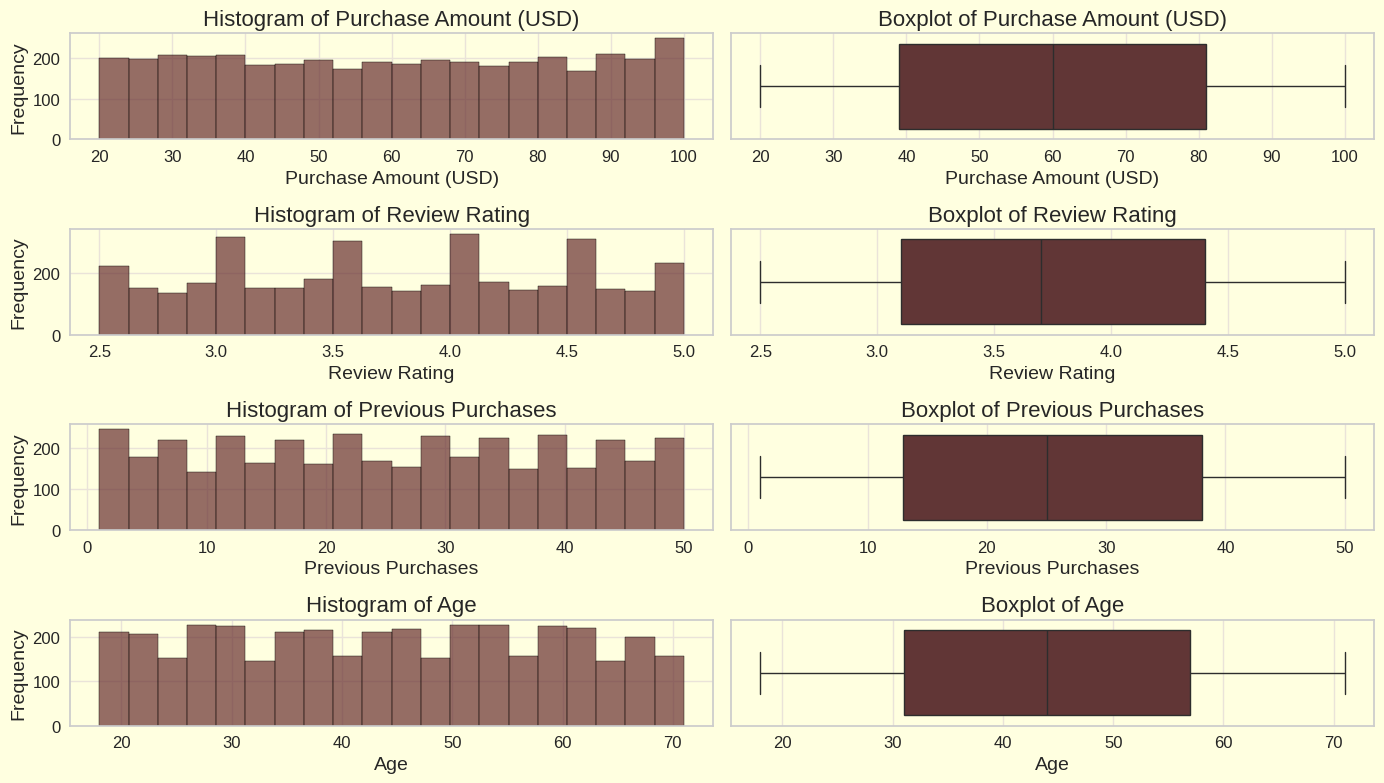

In [ ]:
plt.figure(figsize=(14, 8))

n_cols = 2
n_rows = len(numerical_data.columns)

for i, column in enumerate(numerical_data.columns):
    plt.subplot(n_rows, n_cols, 2 * i + 1)
    sns.histplot(numerical_data[column], bins=20, alpha=0.7, label=column, color="#682F2F")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column}")

    plt.subplot(n_rows, n_cols, 2 * i + 2)
    sns.boxplot(x=numerical_data[column], color="#682F2F")
    plt.xlabel(column)
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

Here we can see that there is no noticable outliers in our data, so we can say that the data is good to go for K-Means clustering already. And beside of the data having no outliers, the data is really balance, I wanna cry, cry of joy

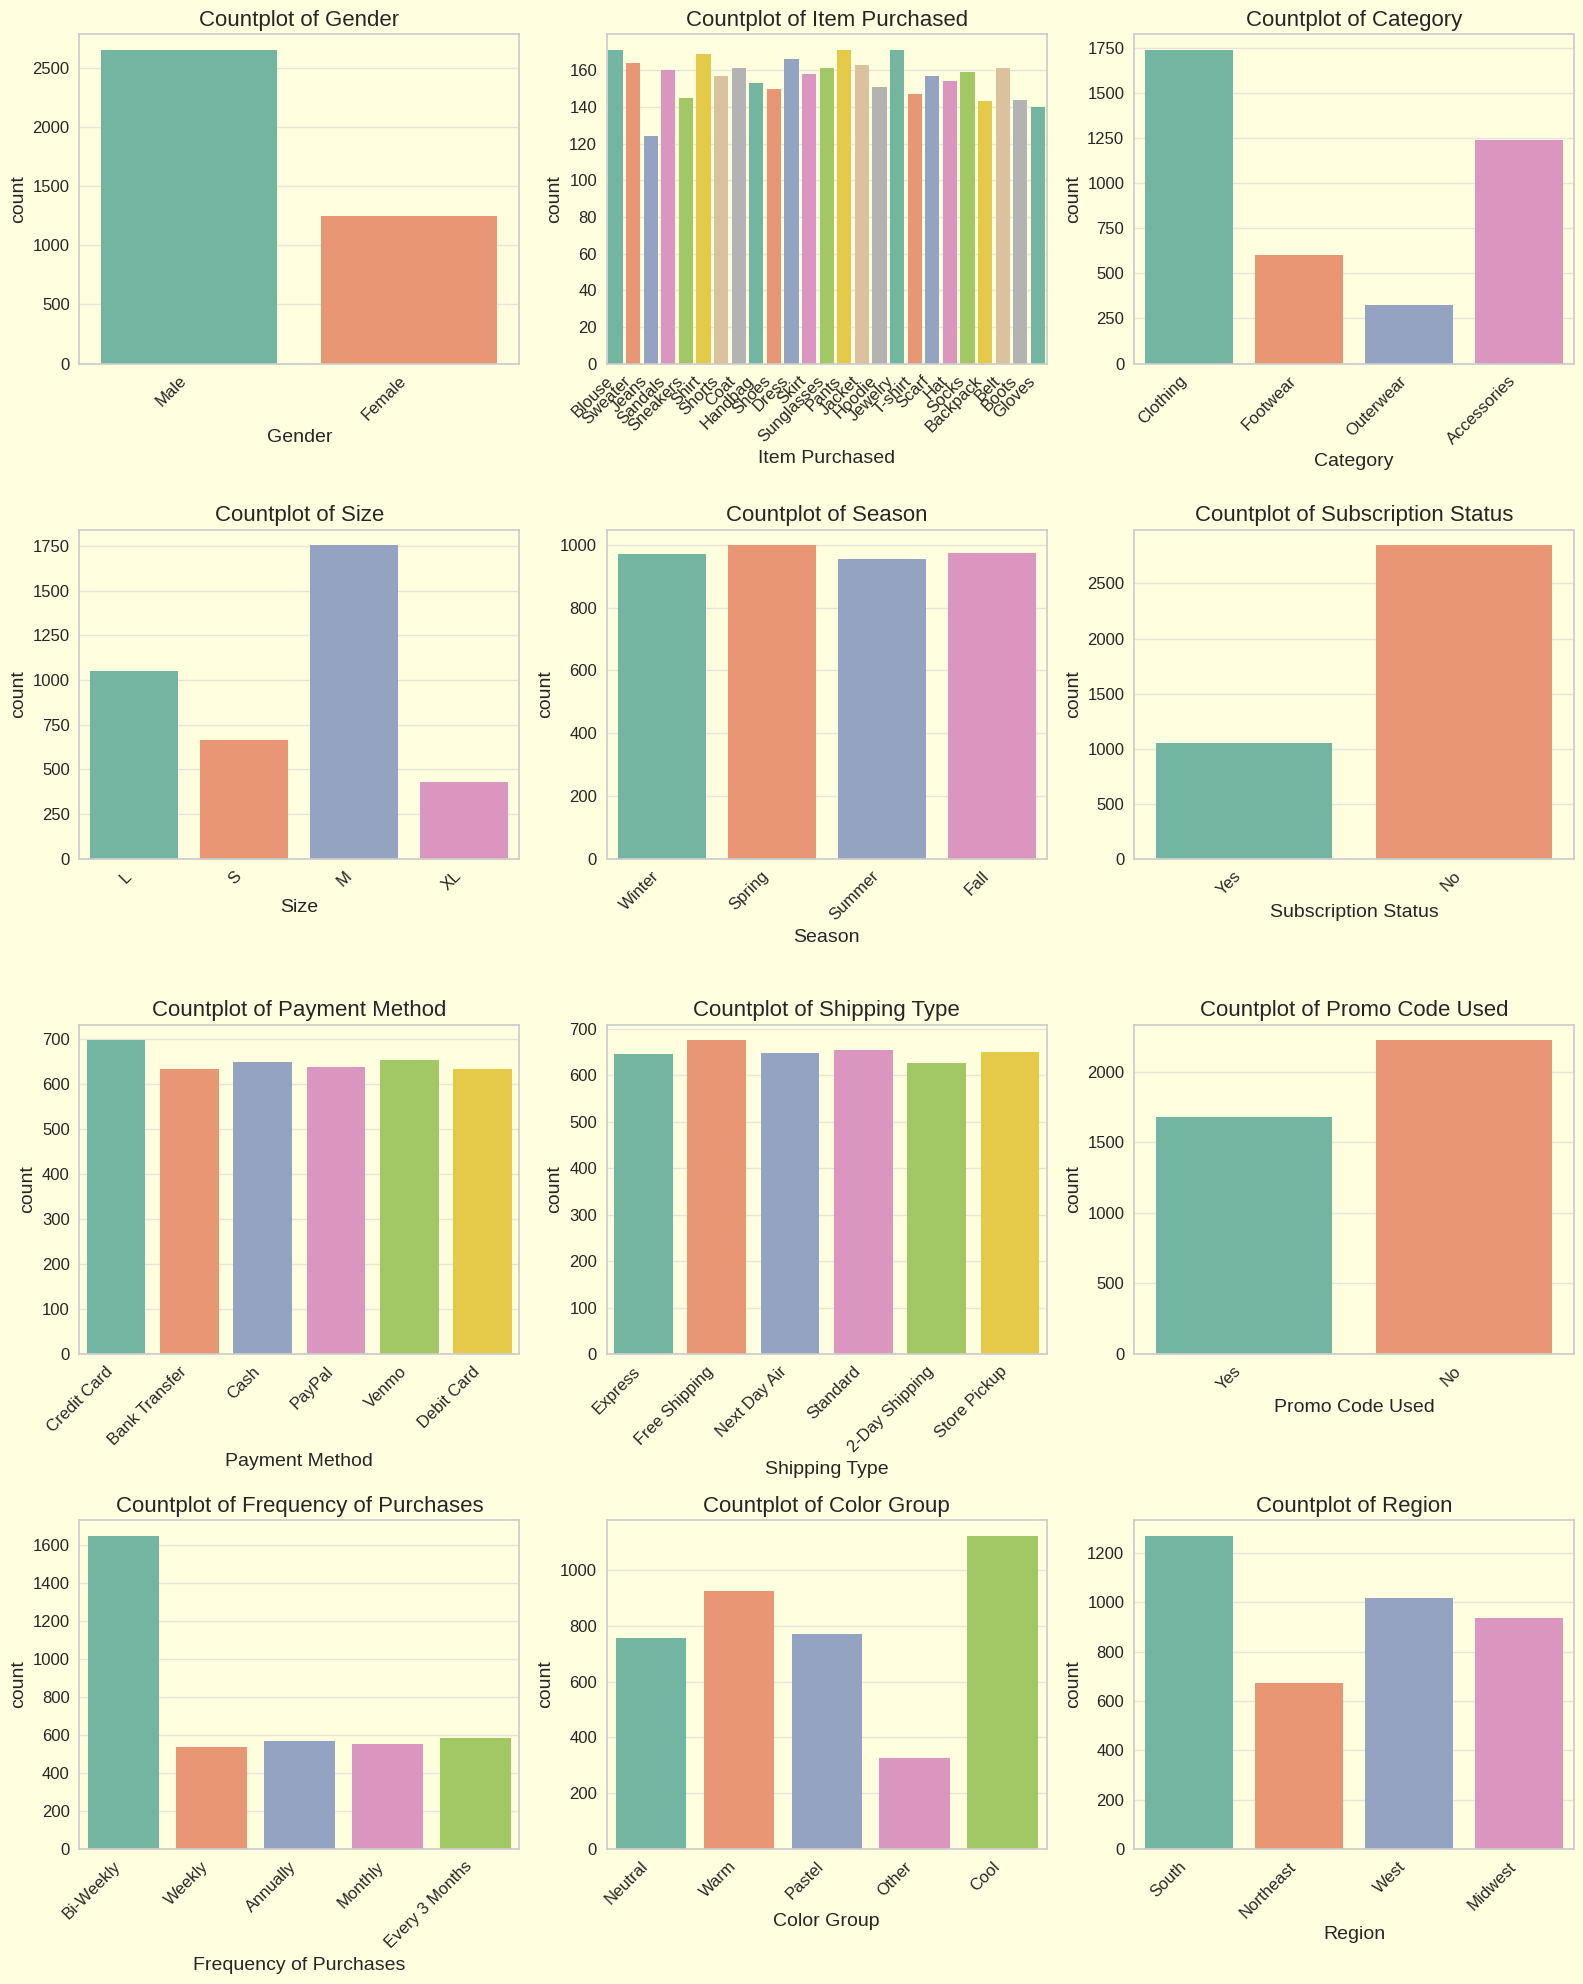

In [ ]:
num_cols = len(categorical_data.columns)
rows = (num_cols + 2) // 3

plt.figure(figsize=(16, 5*rows))

for i, col in enumerate(categorical_data.columns):
    plt.subplot(rows, 3, i + 1)
    sns.countplot(x=col, data=data, palette="Set2")
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

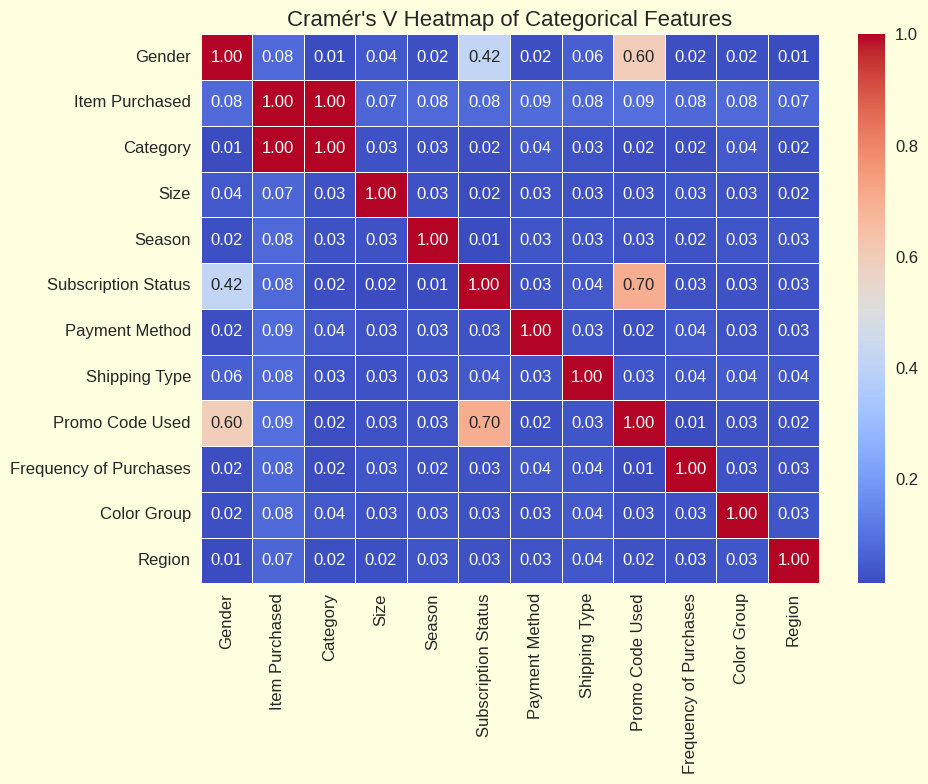

In [11]:
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return np.sqrt(chi2 / (len(x) * (min(contingency_table.shape) - 1)))

cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_data.columns), len(categorical_data.columns))),
                                columns=categorical_data.columns,
                                index=categorical_data.columns)

for col1 in categorical_data.columns:
    for col2 in categorical_data.columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Cramér's V Heatmap of Categorical Features")
plt.tight_layout()
plt.show()

<p>Here in the heatmap I observe a 100% correlation between the purchased item and its category, indicating complete data redundancy. To avoid detrimental effects on clustering performance, one of these columns must be removed.</p>

<h2>We choose to drop Category</h2>
<p>Retaining the specific item offers the potential for more personalized recommendations to our customers within each cluster. This granular approach to recommendations, campaigns, and subsequent offers is expected to enhance customer experience and satisfaction with our service.</p>

<p>This will be implemented during the data preprocessing stage, with copy the data. The original data will be kept for later purpose</p>

# Data Preprocessing

## Dropping the Item Purchased Column

In [12]:
copy_data = data.copy()

In [13]:
copy_data = copy_data.drop('Category', axis =1)
categorical_data = copy_data.select_dtypes(include=['object'])
numerical_data = copy_data.select_dtypes(exclude=['object'])

## Encode the data

In this data I'm gonna use OnehotEncoder with the reason that the data is not ordinal like category, season, payment method, shipping type, and else. Some of the data are also having big cardinality like 5-6 values and thats why im using OnehotEncoder

In [14]:
binary_features = ['Subscription Status', 'Promo Code Used']
onehot_features = ['Payment Method', 'Shipping Type', 'Color Group', 'Region', 'Gender', 'Season', 'Size', 'Item Purchased']
frequency_mapping = {
    'Annually': 1,
    'Quarterly': 4,
    'Monthly': 12,
    'Bi-Weekly': 26,
    'Weekly': 52
}

binary_encoders = {}
for feature in binary_features:
    le = LabelEncoder()
    copy_data[feature] = le.fit_transform(copy_data[feature])
    binary_encoders[feature] = le

# OneHot encoding for categorical columns
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(copy_data[onehot_features])

# Convert OneHot encoded data into a DataFrame
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(onehot_features))
copy_data = copy_data.reset_index(drop=True)
onehot_df = onehot_df.reset_index(drop=True)

copy_data['Frequency of Purchases'] = copy_data['Frequency of Purchases'].map(frequency_mapping)
copy_data = copy_data.drop(columns=onehot_features)
copy_data = pd.concat([copy_data, onehot_df], axis=1)

copy_data.head()


,Purchase Amount (USD),Review Rating,Subscription Status,Promo Code Used,Previous Purchases,Frequency of Purchases,Age,Payment Method_Bank Transfer,Payment Method_Cash,Payment Method_Credit Card,...,Item Purchased_Scarf,Item Purchased_Shirt,Item Purchased_Shoes,Item Purchased_Shorts,Item Purchased_Skirt,Item Purchased_Sneakers,Item Purchased_Socks,Item Purchased_Sunglasses,Item Purchased_Sweater,Item Purchased_T-shirt
0,53,3.1,1,1,14,26,56,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,64,3.1,1,1,2,26,20,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,73,3.1,1,1,23,52,50,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,90,3.5,1,1,49,52,21,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,2.7,1,1,31,1,46,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(copy_data)
scaled_df = pd.DataFrame(scaled_data, columns=copy_data.columns, index=copy_data.index)
scaled_df.head()

,Purchase Amount (USD),Review Rating,Subscription Status,Promo Code Used,Previous Purchases,Frequency of Purchases,Age,Payment Method_Bank Transfer,Payment Method_Cash,Payment Method_Credit Card,...,Item Purchased_Scarf,Item Purchased_Shirt,Item Purchased_Shoes,Item Purchased_Shorts,Item Purchased_Skirt,Item Purchased_Sneakers,Item Purchased_Socks,Item Purchased_Sunglasses,Item Purchased_Sweater,Item Purchased_T-shirt
0,-0.285629,-0.907584,1.644294,1.151339,-0.785831,0.507436,0.737373,-0.439762,-0.446388,2.145565,...,-0.204805,-0.212829,-0.2,-0.204805,-0.205483,-0.196507,-0.20616,-0.207508,-0.209517,-0.197911
1,0.178852,-0.907584,1.644294,1.151339,-1.616552,0.507436,-1.630152,2.273958,-0.446388,-0.466078,...,-0.204805,-0.212829,-0.2,-0.204805,-0.205483,-0.196507,-0.20616,-0.207508,4.772891,-0.197911
2,0.558882,-0.907584,1.644294,1.151339,-0.162789,2.054365,0.342785,-0.439762,2.240205,-0.466078,...,-0.204805,-0.212829,-0.2,-0.204805,-0.205483,-0.196507,-0.20616,-0.207508,-0.209517,-0.197911
3,1.276716,-0.349027,1.644294,1.151339,1.637107,2.054365,-1.564388,-0.439762,-0.446388,-0.466078,...,-0.204805,-0.212829,-0.2,-0.204805,-0.205483,-0.196507,-0.20616,-0.207508,-0.209517,-0.197911
4,-0.454531,-1.466141,1.644294,1.151339,0.391025,-0.979997,0.079727,-0.439762,2.240205,-0.466078,...,-0.204805,-0.212829,-0.2,-0.204805,-0.205483,-0.196507,-0.20616,-0.207508,-0.209517,-0.197911


Okay no we're done with the data preprocessing now its time to another process which is Dimensionality Reduction and Training the K-Means model.

#Dimensionality Reduction

The data have so much features that we have to reduce the dimensionality of it. That's why I'm using PCA to decompose the data and make it more compact by searching for its principal component

In [34]:
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["PC1","PC2", "PC3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,3900.0,-4.664075e-16,1.705130,-2.392801,-1.803352,-0.125894,2.151704,2.698599
PC2,3900.0,-3.643809e-17,1.277559,-2.551620,-1.128686,-0.286840,1.206647,2.548673
PC3,3900.0,1.812795e-16,1.223497,-3.210718,-0.903081,-0.082130,0.778582,4.078276


In [35]:
PCA_df.tail()

,PC1,PC2,PC3
3895,2.142468,-0.733377,-0.755058
3896,1.977381,-1.128636,1.056577
3897,2.208217,-1.939249,0.585645
3898,2.064793,-0.827299,1.505472
3899,2.325255,1.609157,0.057546


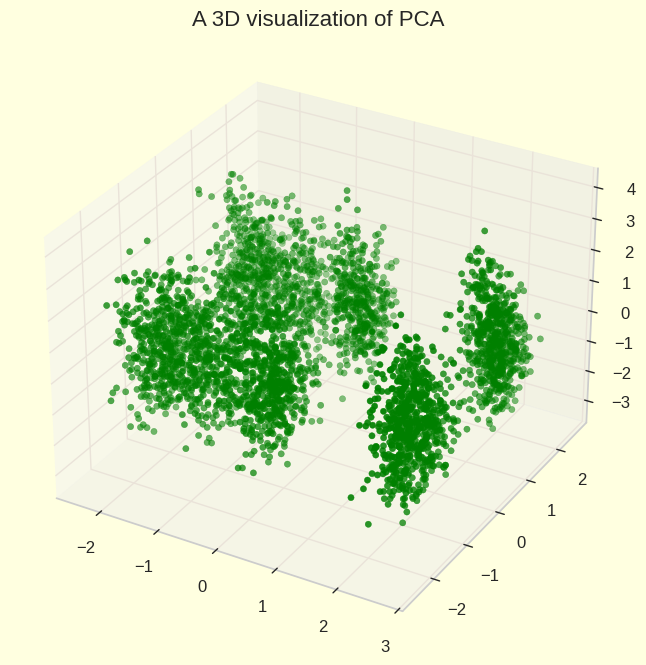

In [36]:
x = PCA_df["PC1"]
y = PCA_df["PC2"]
z = PCA_df["PC3"]
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o", color = "green")
ax.set_title("A 3D visualization of PCA")
plt.show()

# Clustering

## Elbow Method
Im using elbow method to find the best number of Cluster for my K-Means model. Im using Elbow method as a method commonly used of K-Means clustering to decide how many Cluster that we need for our model

Elbow Method to determine the number of clusters to be formed:


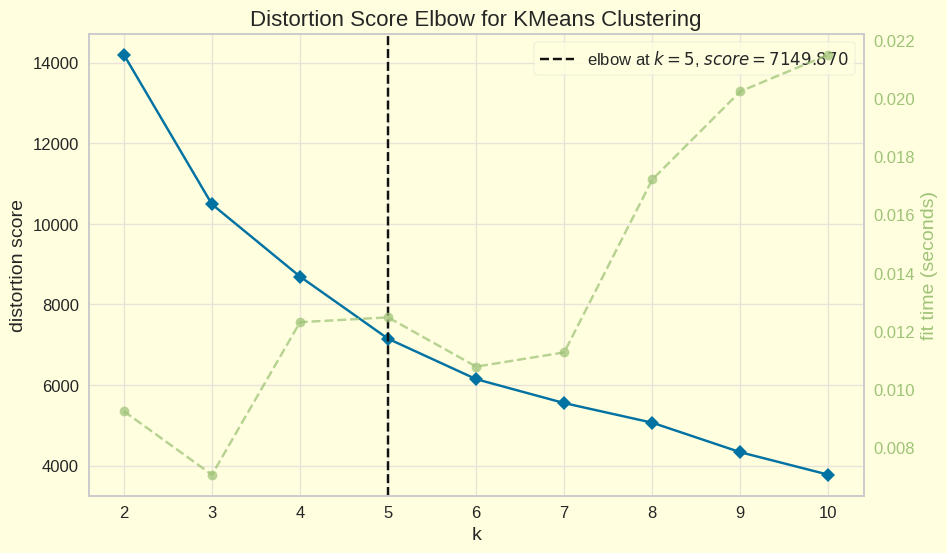

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state = 42), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

## Using K-Means to do Clustering

Here im using K-Means to do clustering and then fine tune it by using the :
- Best number of Cluster i got from The Elbow Method
- Using Inits = 'k-means++' which usually be the best initial parameter

In [38]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state = 42)
yhat_kmeans = kmeans.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_kmeans
data["Clusters"] = yhat_kmeans
data.head()

,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Promo Code Used,Previous Purchases,Frequency of Purchases,Age,Color Group,Region,Clusters
Customer ID,,,,,,,,,,,,,,,,,
1,Male,Blouse,Clothing,53,L,Winter,3.1,Yes,Credit Card,Express,Yes,14,Bi-Weekly,56,Neutral,South,4
2,Male,Sweater,Clothing,64,L,Winter,3.1,Yes,Bank Transfer,Express,Yes,2,Bi-Weekly,20,Warm,Northeast,4
3,Male,Jeans,Clothing,73,S,Spring,3.1,Yes,Cash,Free Shipping,Yes,23,Weekly,50,Warm,Northeast,4
4,Male,Sandals,Footwear,90,M,Spring,3.5,Yes,PayPal,Next Day Air,Yes,49,Weekly,21,Warm,Northeast,2
5,Male,Blouse,Clothing,49,M,Spring,2.7,Yes,Cash,Free Shipping,Yes,31,Annually,46,Pastel,West,2


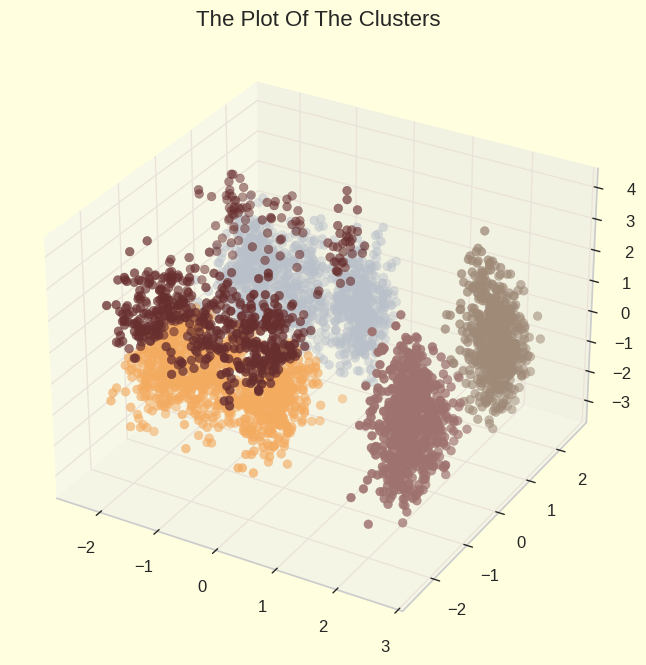

In [39]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

## Evaluation of the Clustering

In [40]:
silhouette_avg = silhouette_score(PCA_df, yhat_kmeans)
print(f"The average silhouette score is: {silhouette_avg}")

The average silhouette score is: 0.5054872034179797


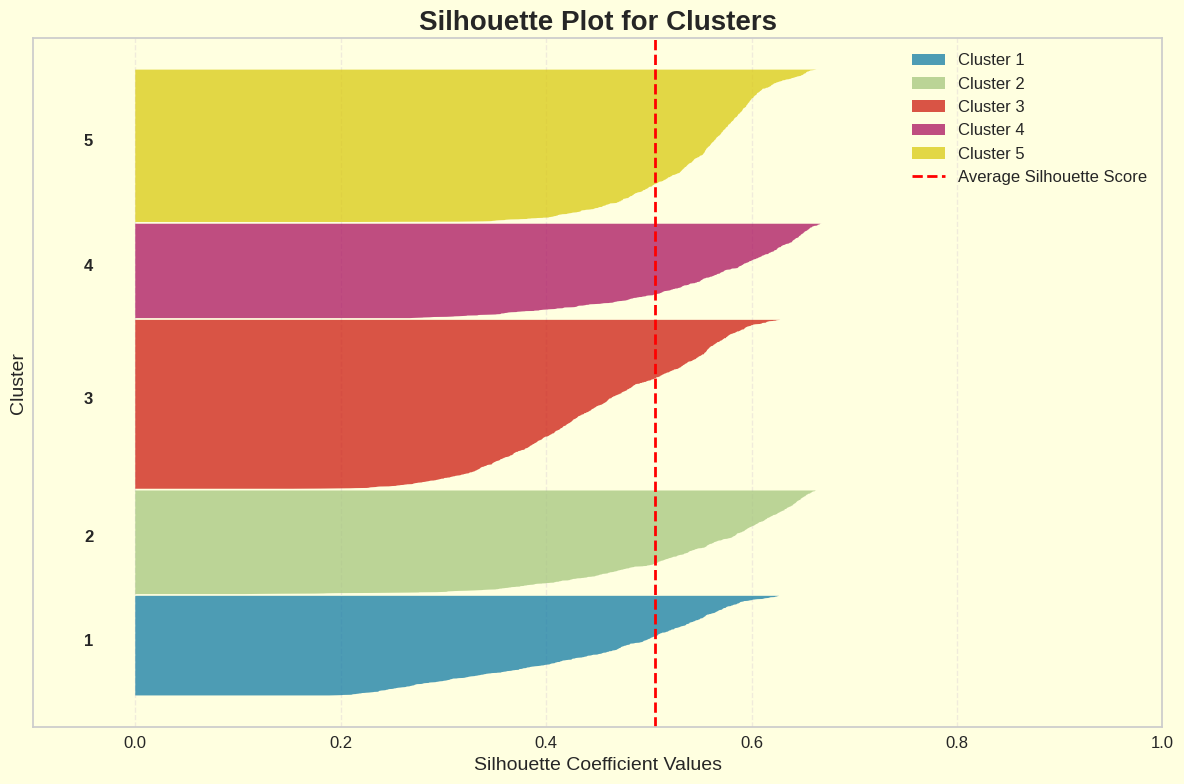

In [41]:
sample_silhouette_values = silhouette_samples(PCA_df, yhat_kmeans)
n_clusters = len(set(yhat_kmeans))
fig, ax = plt.subplots(figsize=(12, 8))
y_lower = 10

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[yhat_kmeans == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
        label=f"Cluster {i + 1}"
    )
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1), fontsize=12, fontweight='bold')

    y_lower = y_upper + 10

ax.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score", linewidth=2)

ax.set_title("Silhouette Plot for Clusters", fontsize=20, fontweight='bold')
ax.set_xlabel("Silhouette Coefficient Values", fontsize=14)
ax.set_ylabel("Cluster", fontsize=14)
ax.set_yticks([])
ax.legend(loc="upper right", fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7)

ax.set_xlim([-0.1, 1])

plt.tight_layout()
plt.show()

From the silhouette plot and also the score of 0.485ish we can conclude that the clusterization is moderately good, means this clustering can be better but oftenly acceptable in certain condition like in e-commerce since the data of customer behavior is usually overlapping

Cluster 1 and 3 appear to be well-formed, as most points in these clusters have silhouette values closer to 1, indicating good separation from other clusters. However, clusters 2, 4, and 5 have more points closer to the average score, suggesting some overlap or less distinct boundaries between them. While the clustering provides a usable grouping of the data, there’s room for improvement, especially in refining the boundaries of the weaker clusters to create more distinct customer segments.

# Profiling

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 1 to 3900
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  3900 non-null   object 
 1   Item Purchased          3900 non-null   object 
 2   Category                3900 non-null   object 
 3   Purchase Amount (USD)   3900 non-null   int64  
 4   Size                    3900 non-null   object 
 5   Season                  3900 non-null   object 
 6   Review Rating           3900 non-null   float64
 7   Subscription Status     3900 non-null   object 
 8   Payment Method          3900 non-null   object 
 9   Shipping Type           3900 non-null   object 
 10  Promo Code Used         3900 non-null   object 
 11  Previous Purchases      3900 non-null   int64  
 12  Frequency of Purchases  3900 non-null   object 
 13  Age                     3900 non-null   int64  
 14  Color Group             3900 non-null   objec

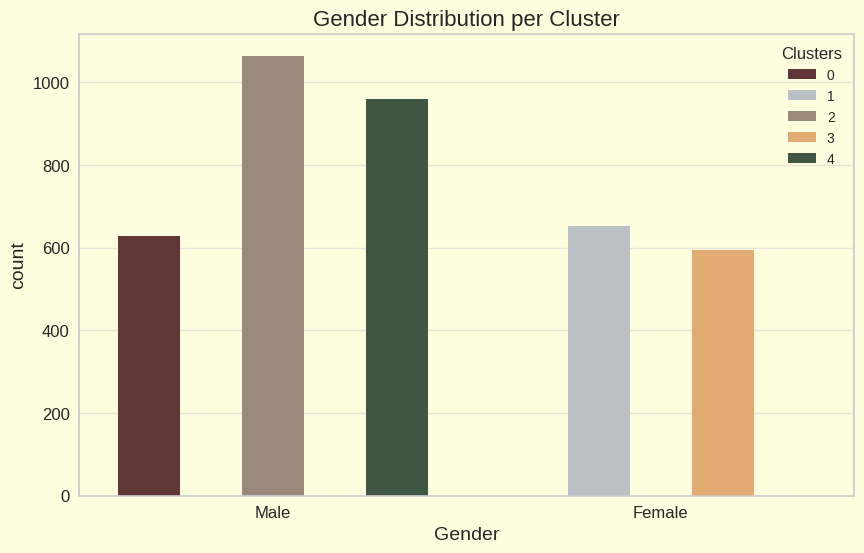

In [43]:
colors = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60", "#3A5A40"]

gender_profile = data.groupby(['Clusters', 'Gender']).size().unstack().fillna(0)
sns.countplot(data=data, x='Gender', hue='Clusters', palette =colors )
plt.title("Gender Distribution per Cluster")
plt.show()

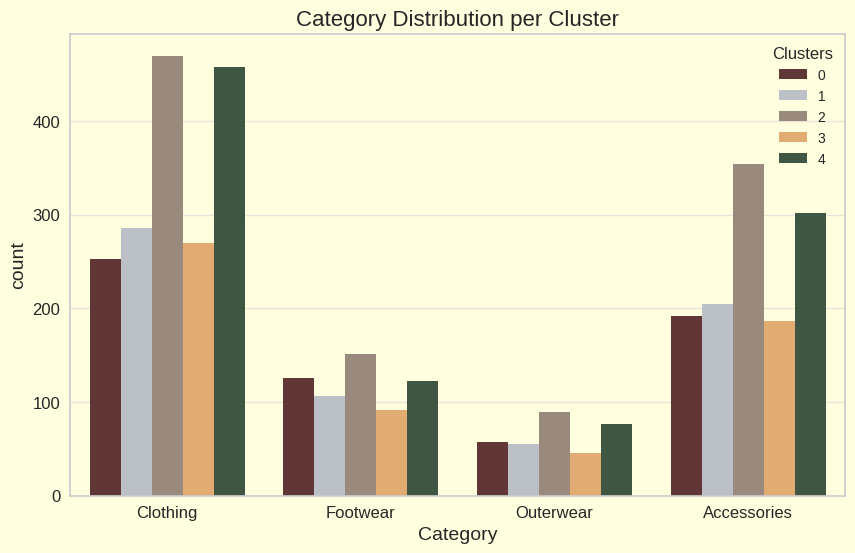

In [44]:
item_profile = data.groupby(['Clusters', 'Category']).size().unstack().fillna(0)
sns.countplot(data=data, x='Category', hue='Clusters', palette = colors)
plt.title("Category Distribution per Cluster")
plt.show()

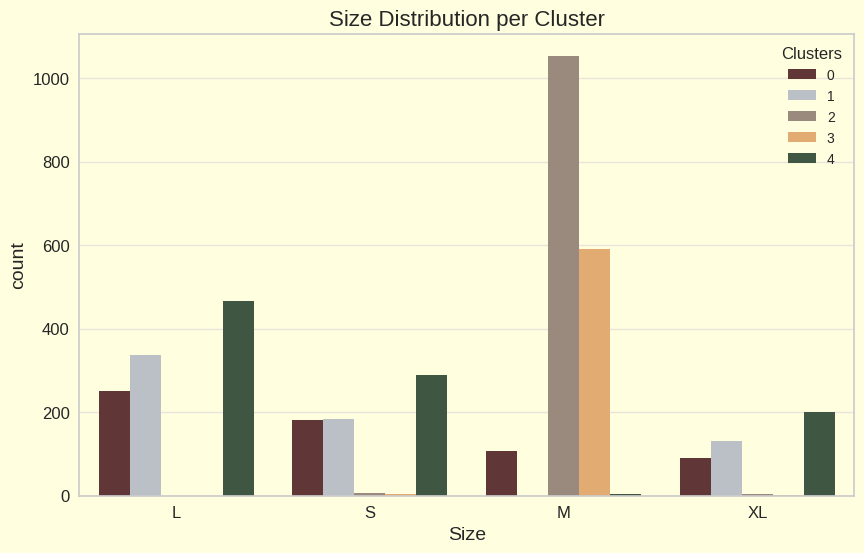

In [45]:
season_profile = data.groupby(['Clusters', 'Size']).size().unstack().fillna(0)
sns.countplot(data=data, x='Size', hue='Clusters', palette = colors)
plt.title("Size Distribution per Cluster")
plt.show()

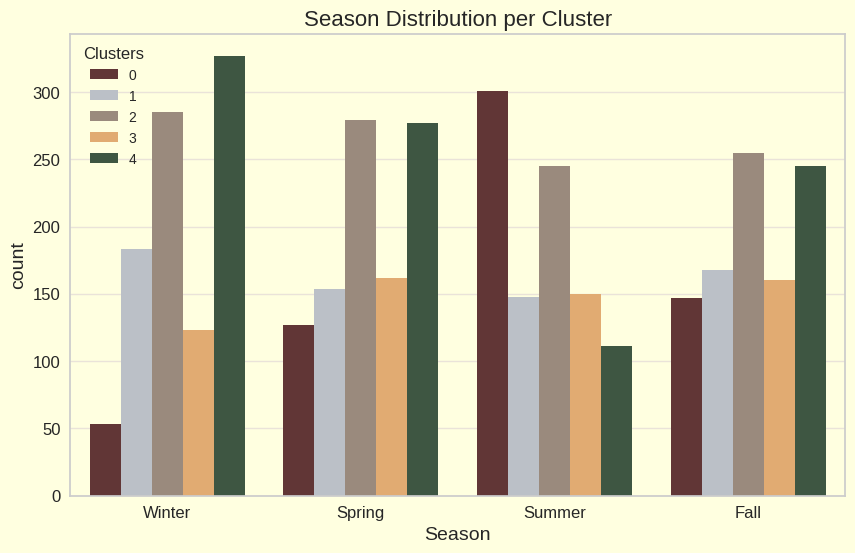

In [46]:
season_profile = data.groupby(['Clusters', 'Season']).size().unstack().fillna(0)
sns.countplot(data=data, x='Season', hue='Clusters', palette = colors)
plt.title("Season Distribution per Cluster")
plt.show()

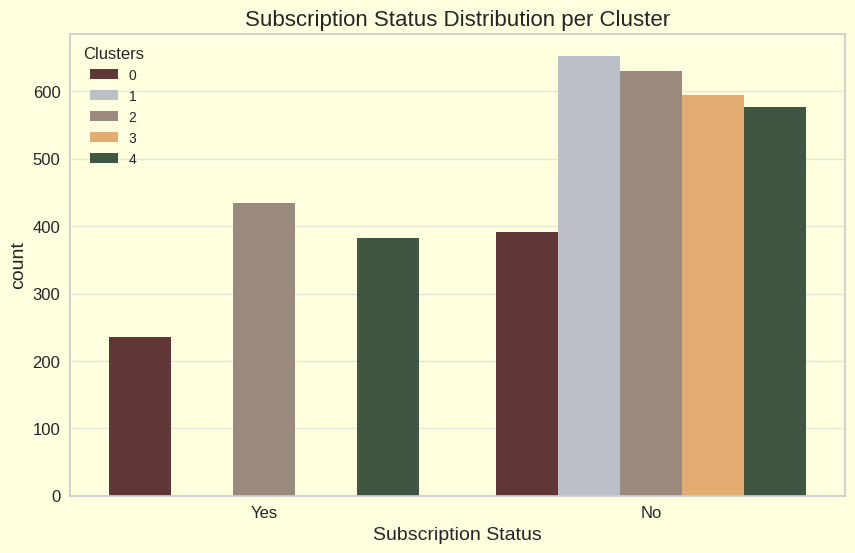

In [47]:
subscription_profile = data.groupby(['Clusters', 'Subscription Status']).size().unstack().fillna(0)
sns.countplot(data=data, x='Subscription Status', hue='Clusters', palette=colors)
plt.title("Subscription Status Distribution per Cluster")
plt.show()

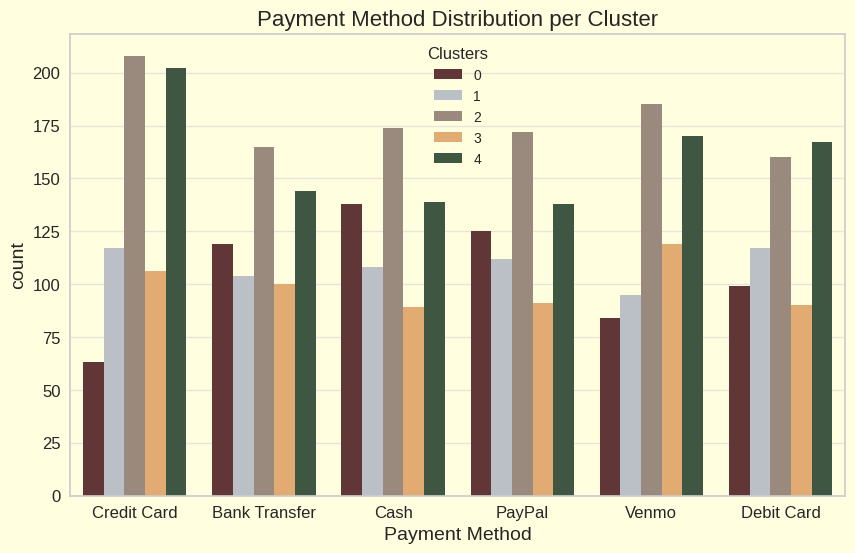

In [48]:
payment_method_profile = data.groupby(['Clusters', 'Payment Method']).size().unstack().fillna(0)
sns.countplot(data=data, x='Payment Method', hue='Clusters', palette=colors)
plt.title("Payment Method Distribution per Cluster")
plt.show()

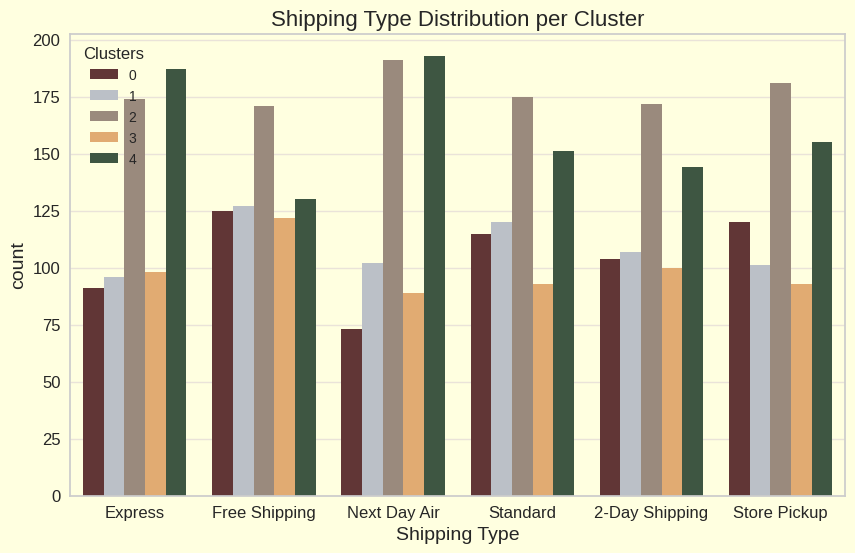

In [49]:
shipping_type_profile = data.groupby(['Clusters', 'Shipping Type']).size().unstack().fillna(0)
sns.countplot(data=data, x='Shipping Type', hue='Clusters', palette=colors)
plt.title("Shipping Type Distribution per Cluster")
plt.show()

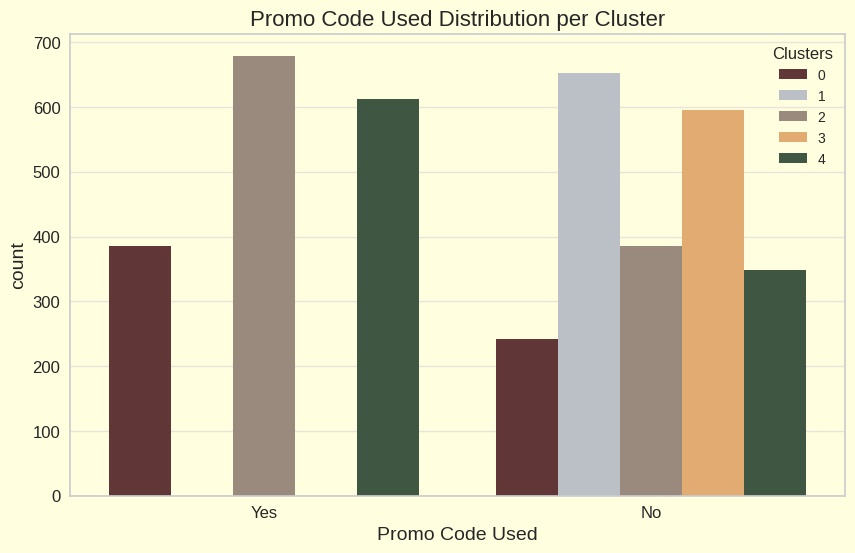

In [50]:
promo_code_profile = data.groupby(['Clusters', 'Promo Code Used']).size().unstack().fillna(0)
sns.countplot(data=data, x='Promo Code Used', hue='Clusters', palette=colors)
plt.title("Promo Code Used Distribution per Cluster")
plt.show()

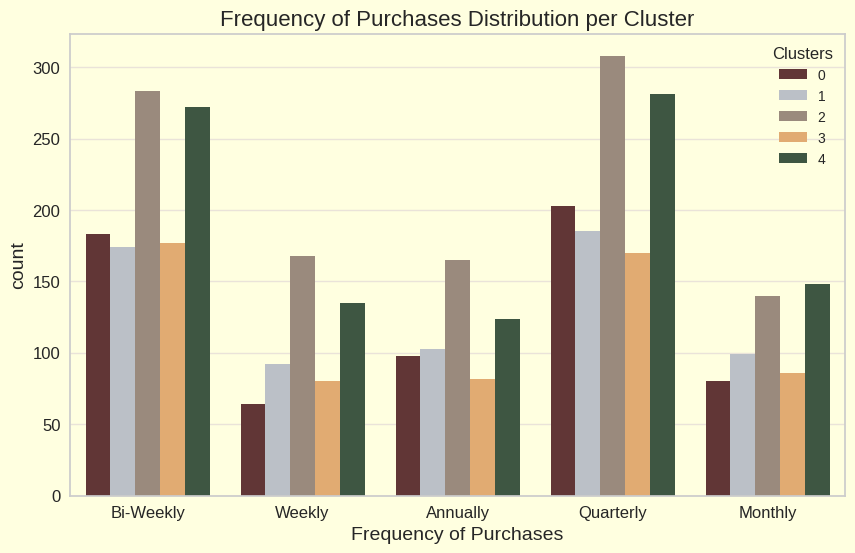

In [51]:
frequency_profile = data.groupby(['Clusters', 'Frequency of Purchases']).size().unstack().fillna(0)
sns.countplot(data=data, x='Frequency of Purchases', hue='Clusters', palette=colors)
plt.title("Frequency of Purchases Distribution per Cluster")
plt.show()

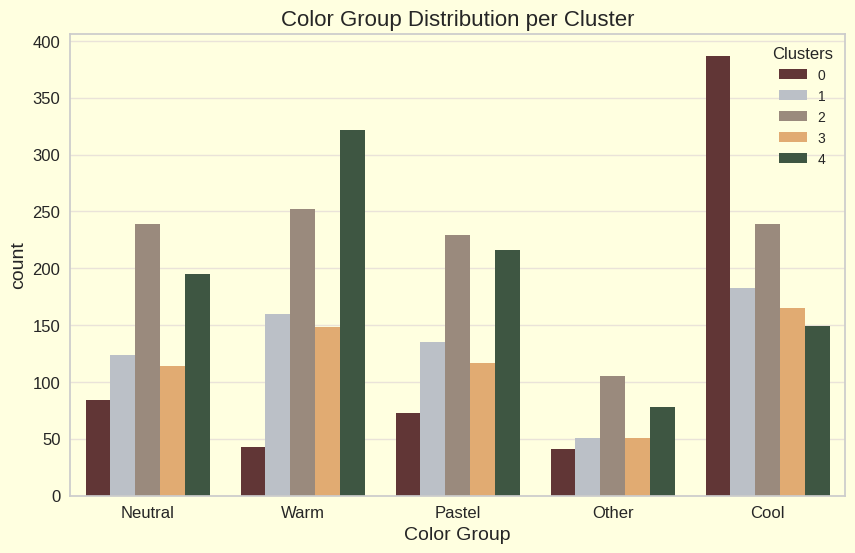

In [52]:
color_group_profile = data.groupby(['Clusters', 'Color Group']).size().unstack().fillna(0)
sns.countplot(data=data, x='Color Group', hue='Clusters', palette=colors)
plt.title("Color Group Distribution per Cluster")
plt.show()

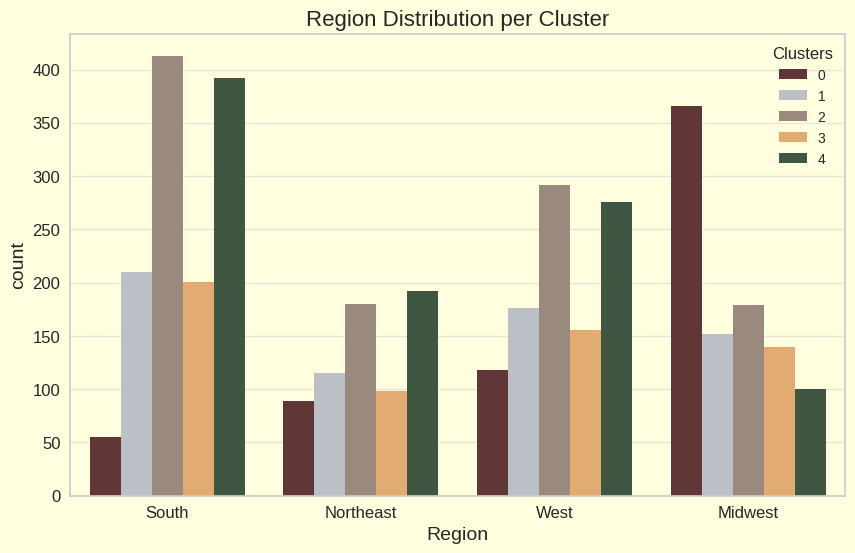

In [53]:
region_profile = data.groupby(['Clusters', 'Region']).size().unstack().fillna(0)
sns.countplot(data=data, x='Region', hue='Clusters', palette=colors)
plt.title("Region Distribution per Cluster")
plt.show()

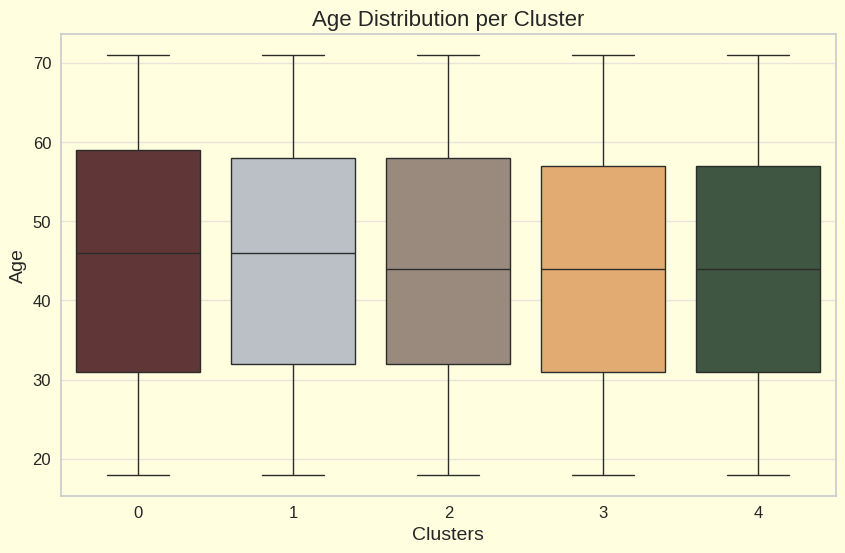

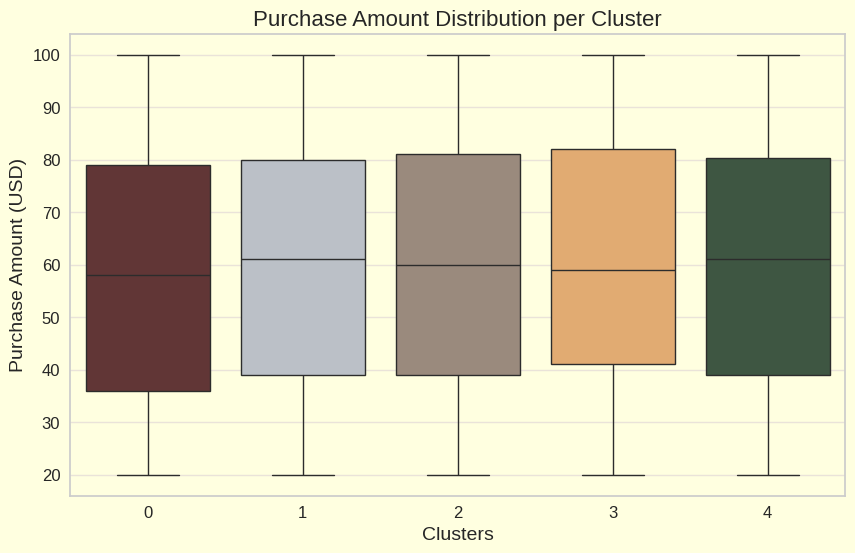

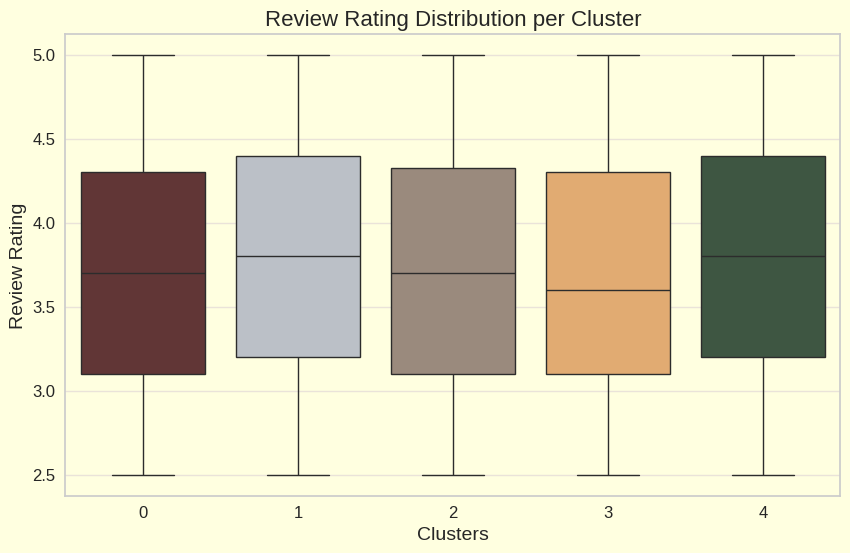

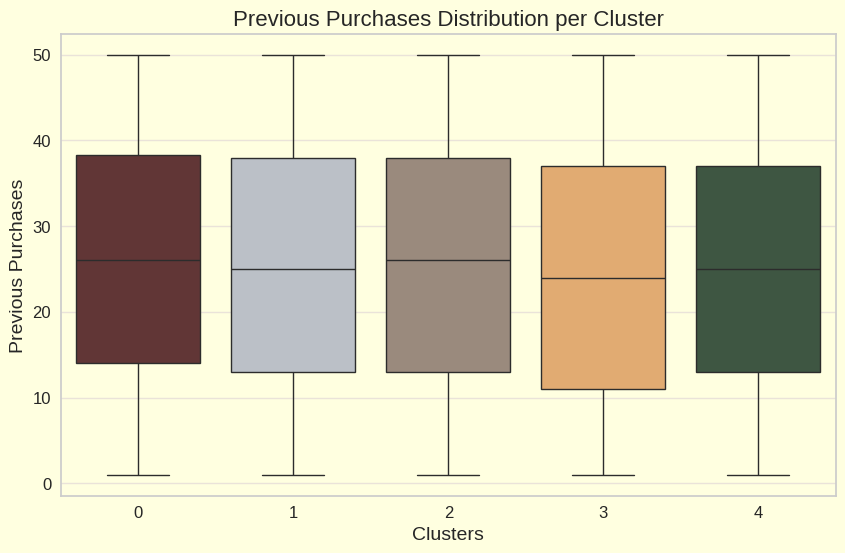

In [54]:
# Age Per Cluster
sns.boxplot(data=data, x='Clusters', y='Age', palette=colors)
plt.title("Age Distribution per Cluster")
plt.show()

# Purchase Amount per Cluster
sns.boxplot(data=data, x='Clusters', y='Purchase Amount (USD)', palette=colors)
plt.title("Purchase Amount Distribution per Cluster")
plt.show()

# Review Rating per Cluster
sns.boxplot(data=data, x='Clusters', y='Review Rating', palette=colors)
plt.title("Review Rating Distribution per Cluster")
plt.show()

# Previous Purchases per Cluster
sns.boxplot(data=data, x='Clusters', y='Previous Purchases', palette=colors)
plt.title("Previous Purchases Distribution per Cluster")
plt.show()

<h3>Cluster 0 --> Casual Bargain Seekers</h3>

- Gender mix: Balanced, slight male lean
- Category preference: Mix of Clothing & Accessories
- Size preference: Spread across L and XL
- Seasonality: Strong spike in Summer purchases
- Promo behavior: Mixed, often uses promos
- Payment & shipping: Likes cash/bank transfer and standard shipping
- Color style: Cool tones (blue, grey, black)


✅ Persona: Budget-conscious casual shoppers, often buying in summer sales, prefer practical payment methods, and go for classic colors. <br>
📢 Marketing angle: Target with summer promotions, bundle deals, and discount vouchers.

<h3>Cluster 1 --> Steady Minimalists</h3>

- Gender mix: More female representation  
- Category preference: Balanced across categories (Clothing & Accessories)  
- Size preference: Mix of S, L, and some XL  
- Seasonality: Spread evenly, not strongly seasonal  
- Promo behavior: Low promo usage, not very discount-driven  
- Payment & shipping: Prefers debit/bank transfer, slower shipping acceptable  
- Color style: Neutral and pastel tones  

✅ Persona: Loyal and steady shoppers, less promo-sensitive, shop consistently year-round. <br>  
📢 Marketing angle: Engage via loyalty/subscription programs and highlight quality over discounts.  


<h3>Cluster 2 --> Fashion-Forward Deal Hunters</h3>

- Gender mix: Mostly male  
- Category preference: Heavy on Clothing + some Accessories  
- Size preference: Dominated by M  
- Seasonality: Consistent across all seasons  
- Promo behavior: Promo code lovers, heavy users of discounts  
- Payment & shipping: Prefer credit card & fast shipping (next-day/express)  
- Color style: Warm & neutral tones  

✅ Persona: Trendy male shoppers, prefer fast delivery, and chase promo codes for clothing. <br>  
📢 Marketing angle: Use flash sales, promo-driven campaigns, and seasonal product launches.  


<h3>Cluster 3 --> Accessory Enthusiasts</h3>

- Gender mix: More female  
- Category preference: Lean toward Accessories (bags, jewelry)  
- Size preference: Mostly M, less variety  
- Seasonality: Balanced but not heavy in Winter  
- Promo behavior: Less frequent promo use  
- Payment & shipping: More standard shipping, mix of payment methods  
- Color style: Cool tones with some neutral  

✅ Persona: Fashion-conscious accessory buyers, not highly discount-driven, steady seasonal shoppers. <br>  
📢 Marketing angle: Promote new accessory collections, upsell clothing with accessories, bundle cross-category offers.  


<h3>Cluster 4 --> Seasonal Stylists</h3>

- Gender mix: Male-dominated  
- Category preference: Strong in Clothing  
- Size preference: Split between L and S  
- Seasonality: Heavy Winter buyers, also strong in Fall  
- Promo behavior: Uses promos but not as aggressively as Cluster 2  
- Payment & shipping: Mix of credit card & faster shipping  
- Color style: Warm & pastel colors  

✅ Persona: Seasonal shoppers who stock up during colder months, stylish and selective. <br>  
📢 Marketing angle: Push winter/fall collections, highlight seasonal colors, and promote premium shipping options.  
